In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### **Load the data**

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape
# the last value is 3 that is the rbg color for each image

(50000, 32, 32, 3)

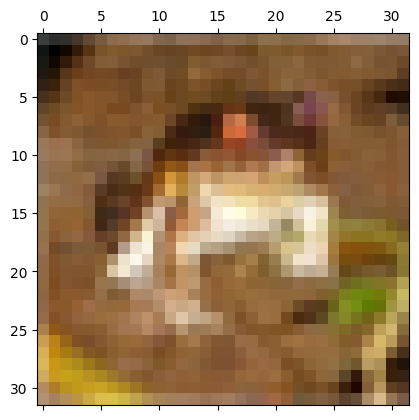

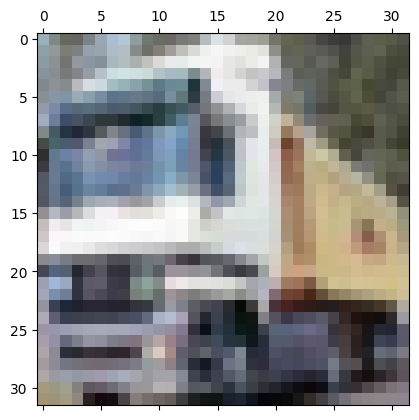

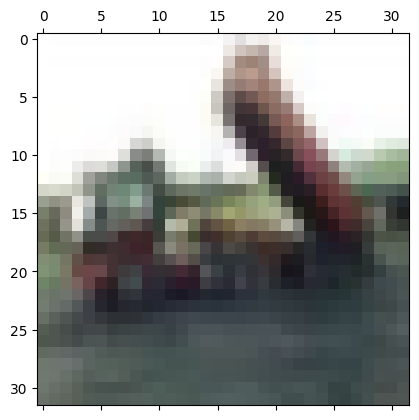

In [3]:
for i in range(3):
    plt.matshow(X_train[i])

### **Feature Engineering**

**1. Reshape the shape of y_train to plot and detect the image**

In [4]:
y_train.shape 
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In there the y_train is 2-dimension shape 50000 rows, 1 column. So I need to reshape to 1 dimension   

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
# Declare the name of the images
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
classes[y_train[0]]

'frog'

In [8]:
# Function to plot images that you want
def plot_pic(X, y, index):
    plt.figure(figsize= (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

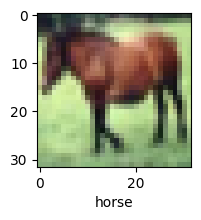

In [9]:
plot_pic(X_train, y_train, 7)

**2. Normalize the training data**

- As I have known, each image is a 3D shape with (32 rows, 32 columns, 3 cols inside each row: represent 3 rgb color channels).

- Moreover, each color channel ranges from 0 to 255px so I will scale the entire data into 0 to 1 in training and test data by dividing to 255

In [10]:
X_train[0][0].shape

(32, 3)

In [11]:
X_train = X_train/ 255
X_test = X_test/ 255

### **Build simple artificial neutral network for image classification**

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)), 
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

d:\Python Download\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.3046 - loss: 1.9318
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4224 - loss: 1.6387
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4516 - loss: 1.5526
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.4759 - loss: 1.4818
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.4922 - loss: 1.4360


**You can see that building with normal ANN, the accuracy is low, just 49%**

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.55      0.55      1000
           1       0.68      0.55      0.61      1000
           2       0.31      0.47      0.38      1000
           3       0.37      0.31      0.34      1000
           4       0.38      0.43      0.41      1000
           5       0.42      0.35      0.38      1000
           6       0.53      0.49      0.51      1000
           7       0.57      0.52      0.54      1000
           8       0.55      0.67      0.60      1000
           9       0.63      0.48      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.49     10000
weighted avg       0.50      0.48      0.49     10000



### **Now let build a CNN to train our images**

In [15]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters= 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3), padding = 'same'),
    layers.MaxPooling2D((2, 2)), # downsampling to (16x16)
    
    layers.Conv2D(filters= 64, kernel_size = (3, 3), activation= 'relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)), # downsamping to (8x8)
    
    # dense
    layers.Flatten(), # Change the 3D matrix to 1D with the size = 8*8*64 = 4096
    layers.Dense(64, activation= 'relu'),
    layers.Dense(10, activation= 'softmax')
])

cnn.compile(optimizer= 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(X_train, y_train, epochs= 10)

d:\Python Download\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.3911 - loss: 1.6638
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6054 - loss: 1.1232
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6690 - loss: 0.9550
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7068 - loss: 0.8526
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7289 - loss: 0.7762
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7505 - loss: 0.7201
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7708 - loss: 0.6590
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7882 - loss: 0.6071
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8048 - loss: 0.5503
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8187 - loss: 0.5194


In [16]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6940 - loss: 0.9291


[0.9298874735832214, 0.6980000138282776]

In [17]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [18]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

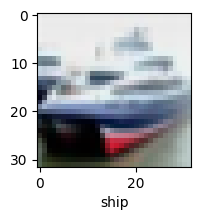

In [19]:
plot_pic(X_test, y_test, 1)

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[2.05892138e-04, 8.70577969e-06, 9.52175033e-05, 9.69508886e-01,
        7.96293443e-06, 2.90383492e-02, 9.35539661e-04, 3.36029880e-05,
        1.64637400e-04, 1.25233407e-06],
       [1.51477316e-02, 1.11915067e-01, 2.89245127e-05, 6.19924958e-06,
        8.15112162e-06, 9.13711862e-09, 1.64849757e-06, 1.25839306e-09,
        8.72695446e-01, 1.96850699e-04],
       [2.52069265e-01, 1.12128414e-01, 1.13009065e-02, 9.11884196e-03,
        2.87547312e-03, 1.02941842e-04, 2.69649026e-04, 3.99523135e-03,
        3.49543989e-01, 2.58595347e-01],
       [7.40187109e-01, 6.91334531e-02, 1.44339148e-02, 2.85508018e-03,
        1.69993972e-03, 1.46196999e-06, 3.39969469e-04, 3.81171026e-06,
        1.69892207e-01, 1.45297090e-03],
       [9.41391875e-07, 5.82563189e-08, 1.00670774e-02, 3.59248905e-03,
        2.95603666e-02, 3.41853913e-04, 9.56436574e-01, 2.55523105e-07,
        2.24821534e-07, 2.08470738e-07]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

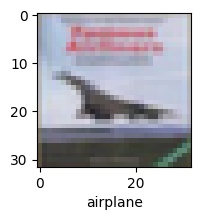

In [22]:
plot_pic(X_test, y_test, 3)

In [23]:
classes[y_classes[3]]

'airplane'

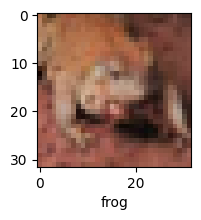

In [24]:
plot_pic(X_test, y_test, 5)

In [25]:
classes[y_classes[5]]

'frog'

In [26]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.83      0.79      0.81      1000
           2       0.58      0.58      0.58      1000
           3       0.50      0.56      0.53      1000
           4       0.67      0.64      0.65      1000
           5       0.67      0.55      0.60      1000
           6       0.67      0.84      0.75      1000
           7       0.76      0.76      0.76      1000
           8       0.79      0.81      0.80      1000
           9       0.80      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

